In [2]:
import numpy as np
import cv2 as cv
import scipy.signal
import matplotlib.pyplot as plt

In [8]:
def plot_results(original, new):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Noisy Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(new, cmap='gray')
    plt.title("Denoised Image")
    plt.axis('off')

    plt.show()

In [11]:
def apply_gaussian_denoise(image_path, sigma=2, kernel_size=7):
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    
    if image is None:
        raise FileNotFoundError("Image not found. Check the path!")

    def gaussian_kernel(size, sigma):
        k = size // 2
        x, y = np.meshgrid(np.linspace(-k, k, size), np.linspace(-k, k, size))
        kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
        return kernel / np.sum(kernel)

    kernel = gaussian_kernel(kernel_size, sigma)

    denoised_image = scipy.signal.convolve2d(image, kernel, mode='same', boundary='symm')

    return image, denoised_image

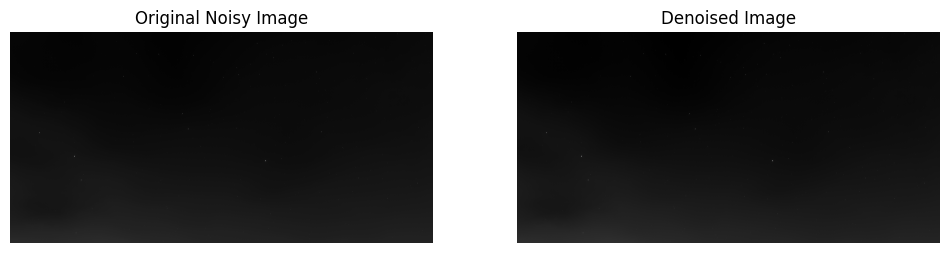

True

In [12]:
image_path = "ursa_minor_3.jpg"  
original, denoised = apply_gaussian_denoise(image_path)
plot_results(original, denoised)
cv.imwrite("denoised_ursa_minor_3.jpg", denoised)

In [ ]:
def adaptive_thresholding(image_path, block_size=11, C=2):
    img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

    if img is None:
        print("Error: Image not found or could not be loaded. Check the path:", image_path)
        return None, None

    adaptive_thresh = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, block_size, C)

    return img, adaptive_thresh

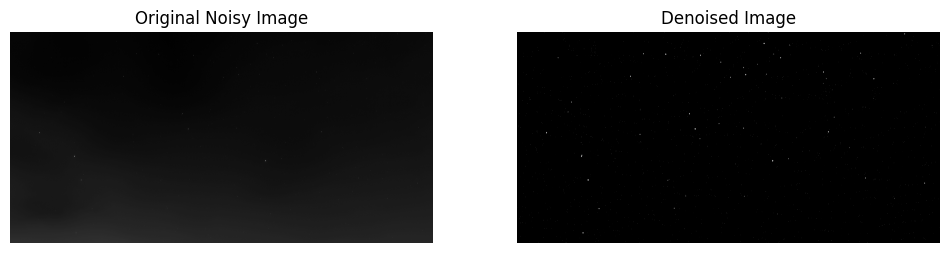

In [38]:
image_path = "denoised_ursa_minor_3.jpg"
original, thresholded = adaptive_thresholding(image_path)
plot_results(original, thresholded)

In [39]:
cv.imwrite("thresholded_denoised_ursa_minor_3.jpg", thresholded)

True